# Qns 1

In [2]:
## if this fails to run, just run it again
from google.colab import files
t_data = files.upload()


Saving hw2-image.txt to hw2-image.txt


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import time

# create numpy array out of 
dataset = np.loadtxt('hw2-image.txt')


In [19]:
# print(dataset.shape)

start_time = time.time()


# initialize important points

num_datapoints, num_features = dataset.shape # important for crafting matrices

# number clusters
k = 8

iterations = 0 # number of iterations of the while loop

# create given centroids
curr_centroids = (np.array([255,255,255,255,0,0,128,0,0,0,255,0,0,128,0,0,0,255,0,0,128,0,0,0])).reshape(k, num_features)

# keep track of old centroids and to compare it to the current to see if there was any change in coordinates
prev_centroids = np.zeros((k, num_features))

# if check is equals 0, means there was no change 
check = np.linalg.norm(curr_centroids - prev_centroids)

# an array to keep track of the number of pixels in each cluster
pixels_in_each_cluster = []

# check number clusters left
clusters_left = 0

# takes the current cluster map
global_cluster_map = []

# append the sum of each iteration's euclidean distance total (the cost)
at_all_costs = []

# where our kmeans begins
while check > 0:
  iterations += 1
  
  # do a check
  check = np.linalg.norm(curr_centroids - prev_centroids)
  
  ## get our Euclidean matrix which will be num datapoints X clusters ##  
  # initialize temp euclidean mat
  temp_euc_mat = np.zeros((k,num_datapoints))
  
  # loop through each centroid and calculate the euclidean distances between each point and that centroid
  for index_c, centroid in enumerate(curr_centroids):
    e_distances = np.linalg.norm(dataset - centroid, axis=1) # array of each datapoint's euc dist wrt centroid
    temp_euc_mat[index_c, :] = e_distances # store into temp array

  # euclidean matrix is the transpose of our temp
  euclidean_matrix = np.transpose(temp_euc_mat)
  
  # taking argmin of each row, we find the index of the cluster that each datapoint belongs to
  cluster_map = np.argmin(euclidean_matrix, axis=1)
  
  # store it in global variable
  global_cluster_map = cluster_map
  
  # to find the total sum of euclidean distances aka cost
  min_map = np.min(euclidean_matrix, axis=1) # first use min to find each min euclidean distance
  the_cost = np.sum(min_map, axis=0) # then sum them all up
  
  # append to global cost array
  at_all_costs.append(the_cost)
  
  ## getting our new centroid ##
  
  # instantiate new centroids
  new_centroids = np.zeros((k, num_features))
  
  # cluster map length
  cluster_map_length = len(cluster_map)
  
  # some clusters might be empty, so we will delete them accordingly. we store their indexes first
  deletable_clusters = []
  
  temp_pixel_cluster_count = []
  
  # iterate through each cluster 
  for cluster_index in range(k):
      
    # using cluster map array, check if the datapoint belongs to this specific cluster and assign 1 or 0. 
    cluster_dpoint_indexes = cluster_map == cluster_index # numpy array of size num_datapoints X 1
    
    # if length of the cluster dpoint indexes is 0, we will store the index of this cluster and remove it later on
    len_cluster = np.sum(cluster_dpoint_indexes) # sums up the ones
    
    # store the length of the cluster to count number of pixels
    temp_pixel_cluster_count.append(len_cluster)
    
    if len_cluster == 0:
      deletable_clusters.append(cluster_index)
    
    # using the mean of the datapoints gathered, create the new centroid and append to new_centroids
    new_centroid = np.mean(dataset[cluster_dpoint_indexes], axis=0)
    new_centroids[cluster_index, :] = new_centroid
    
  
  
  # update our previous and current centroids
  prev_centroids = curr_centroids
  curr_centroids = new_centroids
  
  
  # check if there are deletables, then start deleting
  if len(deletable_clusters) > 0:
    curr_centroids = np.delete(curr_centroids, deletable_clusters, axis=0)
    prev_centroids = np.delete(prev_centroids, deletable_clusters, axis=0)
    k -= len(deletable_clusters)
  
  # update pixel count
  pixels_in_each_cluster = temp_pixel_cluster_count
  
  # update clusters left
  clusters_left = len(curr_centroids)
  
  print("iteration number: " + str(iterations))
  print("number of clusters left: " + str(clusters_left))
  print("new centroids: ")
  print(curr_centroids)

  print("time elapsed:")
  print("--- %s seconds ---" % (time.time() - start_time))
  
  
  


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


iteration number: 1
number of clusters left: 6
new centroids: 
[[226.2480551  208.85269736 194.33031501]
 [203.59562026 135.48836631  77.5030484 ]
 [127.34619478  64.4117936   21.9861835 ]
 [ 92.93181818  94.45454545  89.30113636]
 [ 56.16536313  56.91284916  79.27039106]
 [ 29.20886167  23.7493684   22.21048579]]
time elapsed:
--- 0.09343576431274414 seconds ---
iteration number: 2
number of clusters left: 6
new centroids: 
[[235.90366054 231.99927154 226.03988345]
 [189.74227327 125.89648492  74.8227235 ]
 [129.9375122   61.3082561   14.90686585]
 [114.89179394 102.59228579  93.03986539]
 [ 55.73290027  50.30683989  57.78945357]
 [ 34.46545786  24.28230345  20.13988534]]
time elapsed:
--- 0.16414189338684082 seconds ---
iteration number: 3
number of clusters left: 6
new centroids: 
[[239.33307423 236.21609017 230.92324135]
 [186.91215592 122.41490858  71.43122363]
 [130.28521915  60.18096139  12.75239949]
 [122.11700535 104.7713369   92.2057754 ]
 [ 63.41741742  46.81812247  44.46624

## a) How many clusters are there in the end

In [20]:
print("Number of clusters left is " + str(clusters_left))

Number of clusters left is 6


## b) The final centroids of each cluster

In [21]:
final_centroids = pd.DataFrame(curr_centroids)
headers = ['R', 'G', 'B']
final_centroids.columns = headers
print("The final centroids are")
print(final_centroids)

The final centroids are
            R           G           B
0  241.229615  238.625152  233.862880
1  194.411587  136.333114   90.943647
2  136.265556   61.089731   10.103855
3  157.291733   97.593975   51.433296
4   78.927437   37.108287   13.070705
5   25.978002   23.235754   23.605991


## c) The number of pixels associated to each cluster

In [22]:
print("The number of pixels in each cluster")
for i in range(len(pixels_in_each_cluster)):
  print("Pixels in Centroid "+ str(i) + ": " + str(pixels_in_each_cluster[i]))

The number of pixels in each cluster
Pixels in Centroid 0: 4930
Pixels in Centroid 1: 15190
Pixels in Centroid 2: 52535
Pixels in Centroid 3: 22075
Pixels in Centroid 4: 40365
Pixels in Centroid 5: 74917


## d) Plot the sum of squareed Euclidean distance of each pixel to their nearest centroid against the iteration number of the algorithm

Text(0, 0.5, 'Sum of squared Euclidean Distances(Aka Cost)')

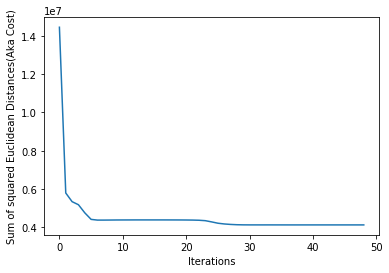

In [23]:
x = range(iterations)
y = at_all_costs

plt.plot(x,y)
plt.xlabel('Iterations')
plt.ylabel('Sum of squared Euclidean Distances(Aka Cost)')

## Original Obama

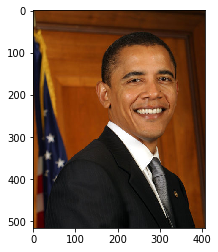

In [24]:

# reshape into m x n x 3
ob = pd.read_csv('hw2-image.txt', header=None, sep=" ")
headers = ['R', 'G', 'B']
ob.columns = headers
obama = np.reshape(ob.values, (516, 407, 3))
plt.imshow(obama)



## Clustered Obama

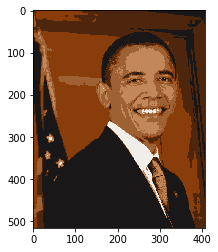

In [25]:
# new obama matrix
new_obama = np.zeros((num_datapoints, num_features))

# use the global cluster map to find each pixel and replace it with corresponding centroid

len_map = len(global_cluster_map)

for centroid_index in range(k):
  for i in range(len_map):
    if global_cluster_map[i] == centroid_index:
      new_obama[i, :] = curr_centroids[centroid_index]

      
# must use new_obama in int mode
new_obama_df = pd.DataFrame(new_obama.astype(int))
headers = ['R', 'G', 'B']
new_obama_df.columns = headers
# reshape the df
obamaobama = np.reshape(new_obama_df.values, (516, 407, 3))
plt.imshow(obamaobama)